In [23]:
from sknetwork.clustering import Louvain, modularity, PropagationClustering, KMeans
from sknetwork.visualization import svg_graph, svg_digraph, svg_bigraph
from IPython.display import SVG
from sknetwork.embedding import GSVD
import networkx as nx
import geopandas as gpd
import matplotlib.pyplot as plt
from infomap import Infomap
import random
import numpy as np
import csrgraph as cg
import numpy as np
from collections import Counter
import pandas as pd
import time

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from apyori import apriori
import pygraphviz as PG
from IPython import display

### Functions

In [25]:
def get_repeated_walks(walks):
    
    records = []
    for i in range(len(walks)):
        records.append([str(walks[i][j]) for j in range(0, 5)])
        
    association_rules = apriori(records, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=3)
    association_results = list(association_rules)
    
    walks_repeated_order = []
    walks_repeated=[]
    for i in association_results:
        pair = i[0] 
        items = [x for x in pair]
        walks_repeated_order.append((items, i[2][0][2]))
        walks_repeated.append(items)

    walks_repeated_order = sorted(walks_repeated_order,key=lambda item: item[1], reverse=True)
    
    turisG = PG.AGraph(directed=False, strict=True)
    
    for w in walks_repeated:
        for i in range(len(w)-1):
            turisG.add_edge(w[i],w[i+1])

    
    return turisG

In [26]:
def node2vec_Top(G_dep, uImgWalk, uDotWalk, walklen, epochs, start_nodes, return_weight, neighbor_weight):

    G = cg.csrgraph(G_dep, threads=20) 
    node_names = G.names
    


    walks = G.random_walks(walklen=walklen, # length of the walks
                    epochs=epochs, # how many times to start a walk from each node
                    start_nodes=start_nodes, # the starting node. It is either a list (e.g., [2,3]) or None. If None it does it on all nodes and returns epochs*G.number_of_nodes() walks
                    return_weight=return_weight, #propability to return to its predecessor
                    neighbor_weight=neighbor_weight)

    walks = np.vectorize(lambda x: node_names[x])(walks)
    
    turisG = get_repeated_walks(walks)
         
    #save the graph in dot format
    turisG.write(uDotWalk)

    #pygraphviz renders graphs in neato by default, 
    #so you need to specify dot as the layout engine
    turisG.layout(prog='dot')

    turisG.draw(uImgWalk)

### Departamentos

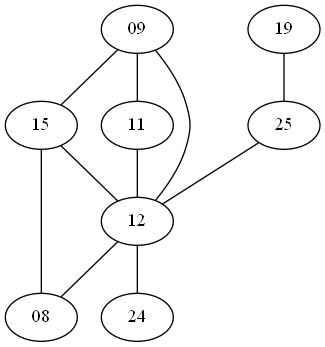

In [27]:
uGraph="Input/grafoPeruDepartamentos.net"
uImgWalk="Figuras/corredorDepartamental_RW.png"
uDotWalk="Output/corredorDepartamental_RW.dot"

G_dep = nx.DiGraph(nx.read_pajek(uGraph))
node2vec_Top(G_dep, uImgWalk, uDotWalk, 6, 100, None, 0, 1)
display.Image(uImgWalk)

### Provincias

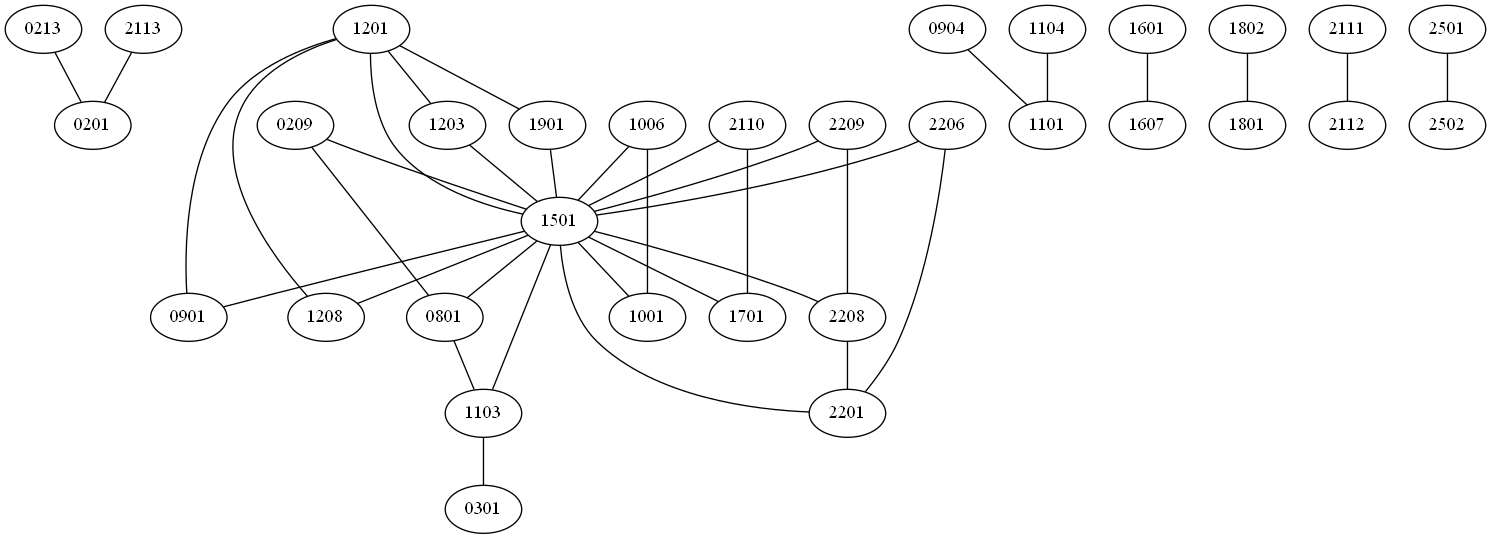

In [28]:
uGraph="Input/grafoPeruProvincias.net"
uImgWalk="Figuras/corredorProvincial_RW.png"
uDotWalk="Output/corredorProvincial_RW.dot"
level="pro"
walklen, epochs, start_nodes, return_weight, neighbor_weight = 6, 100, None, 0, 1

G_pro = nx.DiGraph(nx.read_pajek(uGraph))
node2vec_Top(G_pro, uImgWalk, uDotWalk,  walklen, epochs, start_nodes, return_weight, neighbor_weight)
display.Image(uImgWalk)

### Distritos

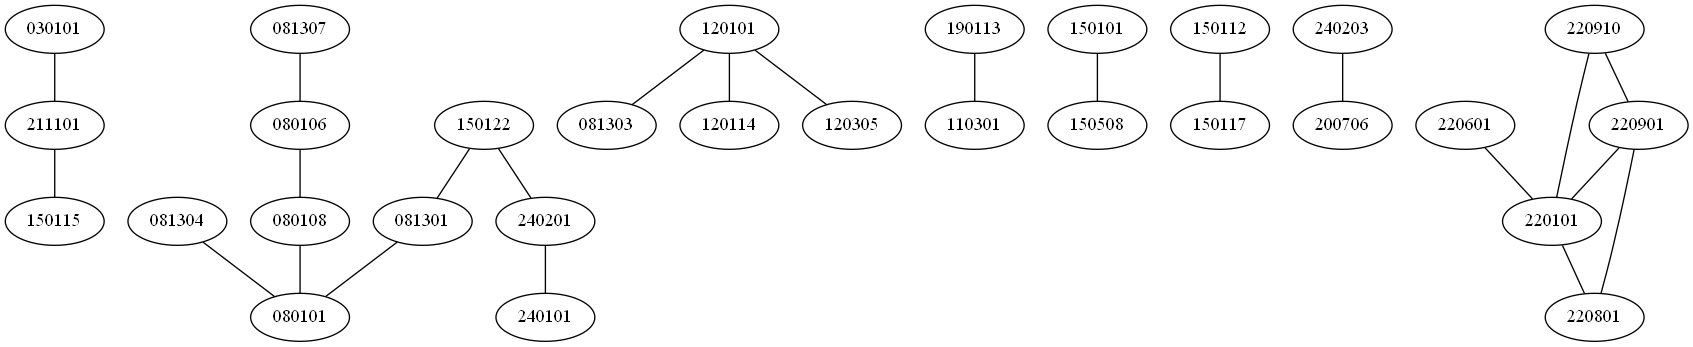

In [29]:
uGraph="Input/grafoPeruDistritos.net"
uImgWalk="Figuras/corredorDistrital_RW.png"
uDotWalk="Output/corredorDistrital_RW.dot"
level="dis"

walklen, epochs, start_nodes, return_weight, neighbor_weight = 7, 100, None, 0, 1

G_dis = nx.DiGraph(nx.read_pajek(uGraph))
node2vec_Top(G_dis, uImgWalk, uDotWalk, walklen, epochs, start_nodes, return_weight, neighbor_weight)
display.Image(uImgWalk)
